In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("/content/adult 3.csv")
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [3]:

df = df.replace('?', pd.NA)
df = df.dropna()

In [4]:
df.reset_index(drop=True, inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45222 entries, 0 to 45221
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              45222 non-null  int64 
 1   workclass        45222 non-null  object
 2   fnlwgt           45222 non-null  int64 
 3   education        45222 non-null  object
 4   educational-num  45222 non-null  int64 
 5   marital-status   45222 non-null  object
 6   occupation       45222 non-null  object
 7   relationship     45222 non-null  object
 8   race             45222 non-null  object
 9   gender           45222 non-null  object
 10  capital-gain     45222 non-null  int64 
 11  capital-loss     45222 non-null  int64 
 12  hours-per-week   45222 non-null  int64 
 13  native-country   45222 non-null  object
 14  income           45222 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.2+ MB


In [6]:
from sklearn.preprocessing import LabelEncoder

In [7]:
data = df.copy()

In [8]:
cat_cols = data.select_dtypes(include='object').columns

In [9]:
le = LabelEncoder()
for col in cat_cols:
    data[col] = le.fit_transform(data[col])

data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,2,226802,1,7,4,6,3,2,1,0,0,40,38,0
1,38,2,89814,11,9,2,4,0,4,1,0,0,50,38,0
2,28,1,336951,7,12,2,10,0,4,1,0,0,40,38,1
3,44,2,160323,15,10,2,6,0,2,1,7688,0,40,38,1
4,34,2,198693,0,6,4,7,1,4,1,0,0,30,38,0


In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X = data.drop('income', axis=1)
y = data['income']


In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score


In [15]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC()
}



In [16]:

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    print(f"{name} Accuracy: {acc:.4f}")

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Accuracy: 0.8078
Decision Tree Accuracy: 0.8083
Random Forest Accuracy: 0.8551
KNN Accuracy: 0.7768
SVM Accuracy: 0.7949


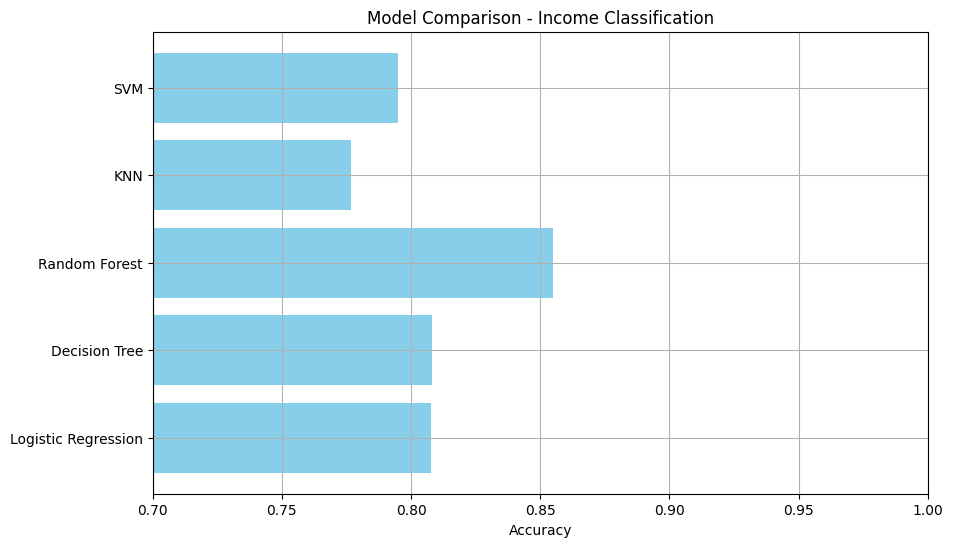

In [17]:
import matplotlib.pyplot as plt

# Plot accuracy comparison
names = list(results.keys())
scores = list(results.values())

plt.figure(figsize=(10, 6))
plt.barh(names, scores, color='skyblue')
plt.xlabel("Accuracy")
plt.title("Model Comparison - Income Classification")
plt.xlim(0.7, 1.0)
plt.grid(True)
plt.show()


In [18]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [19]:
best_model = RandomForestClassifier()
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

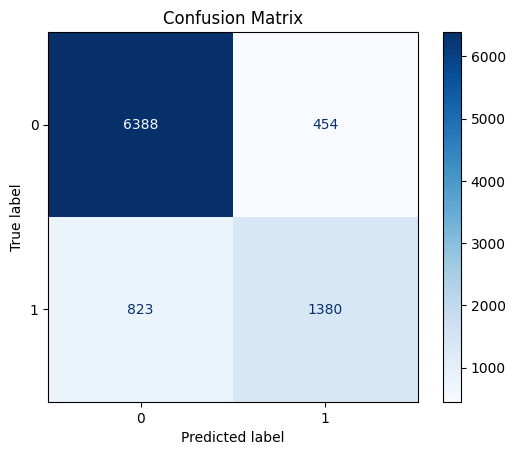

In [20]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

In [21]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.93      0.91      6842
           1       0.75      0.63      0.68      2203

    accuracy                           0.86      9045
   macro avg       0.82      0.78      0.80      9045
weighted avg       0.85      0.86      0.85      9045



In [25]:
import joblib

In [26]:
joblib.dump(model, 'salary_prediction_model.pkl')

['salary_prediction_model.pkl']

In [27]:
from google.colab import files
files.download('salary_prediction_model.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [35]:
%%writefile app.py
import streamlit as st
import pandas as pd
import numpy as np
import joblib

# Load the trained model
model = joblib.load("salary_prediction_model.pkl")  # Ensure this matches your saved model file

# Set page configuration
st.set_page_config(
    page_title="Employee Salary Classification",
    page_icon="💼",
    layout="centered"
)

# App title
st.title("💼 Employee Salary Classification App")
st.markdown("Predict whether an employee earns >50K or ≤50K based on input features.")

# Sidebar form for single prediction
st.sidebar.header("Input Employee Details")

age = st.sidebar.slider("Age", 18, 65, 30)
education = st.sidebar.selectbox("Education Level", [
    "Bachelors", "Masters", "PhD", "HS-grad", "Assoc", "Some-college"
])
occupation = st.sidebar.selectbox("Job Role", [
    "Tech-support", "Sales", "Exec-managerial", "Craft-repair", "Other-service"
])
hours_per_week = st.sidebar.slider("Hours per week", 1, 80, 40)
experience = st.sidebar.slider("Years of Experience", 0, 40, 5)

# Encode categorical inputs (basic manual encoding — match this with training!)
education_map = {
    "Bachelors": 1, "Masters": 2, "PhD": 3,
    "HS-grad": 4, "Assoc": 5, "Some-college": 6
}
occupation_map = {
    "Tech-support": 1, "Sales": 2, "Exec-managerial": 3,
    "Craft-repair": 4, "Other-service": 5
}

# Create dataframe
input_data = pd.DataFrame([{
    "age": age,
    "education": education_map[education],
    "occupation": occupation_map[occupation],
    "hours-per-week": hours_per_week,
    "experience": experience
}])

st.subheader("Input Data")
st.write(input_data)

# Predict button
if st.button("Predict Salary Class"):
    prediction = model.predict(input_data)
    result = ">50K" if prediction[0] == 1 else "<=50K"
    st.success(f"🎯 Predicted Salary Class: **{result}**")

# Optional batch prediction (upload CSV)
st.subheader("📂 Batch Prediction (Upload CSV)")
uploaded_file = st.file_uploader("Upload CSV with employee data", type=["csv"])

if uploaded_file:
    batch_data = pd.read_csv(uploaded_file)

    # Replace categorical values with mappings
    batch_data['education'] = batch_data['education'].map(education_map)
    batch_data['occupation'] = batch_data['occupation'].map(occupation_map)

    preds = model.predict(batch_data)
    batch_data['Predicted Salary'] = np.where(preds == 1, '>50K', '<=50K')

    st.write("📊 Prediction Results")
    st.dataframe(batch_data)


Overwriting app.py


In [36]:
!pip install streamlit pyngrok

In [37]:
!ngrok authtoken 306Hp0ZYbtXp369ZKcNYxZeMKMl_4gByzSfFCuvuroZkfnwFN

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [38]:
import os
import threading

# Function to run Streamlit
def run_streamlit():
    os.system('streamlit run app.py --server.port 8501')

# Run Streamlit in a separate thread
thread = threading.Thread(target=run_streamlit)
thread.start()


In [39]:
from pyngrok import ngrok
import time

# Wait a few seconds to make sure Streamlit is ready
time.sleep(5)

# Create a tunnel to the Streamlit port
public_url = ngrok.connect(8501)
print("🔗 Your Streamlit app is live here:", public_url)


🔗 Your Streamlit app is live here: NgrokTunnel: "https://0bc620fe7a8c.ngrok-free.app" -> "http://localhost:8501"
